<a href="https://colab.research.google.com/github/IreneScarpanti/Tesi/blob/main/Keras_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [284]:
mnist = tf.keras.datasets.mnist
# Carica l'intero dataset MNIST
(x, y), (x_test, y_test) = mnist.load_data()

# Combina i set di train e test in un unico dataset
x = np.concatenate((x, x_test))
y = np.concatenate((y, y_test))

x = x/255.0
# Suddividi i dati
x_train, x_validation, y_train, y_validation = train_test_split(x, y, train_size=0.84286, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.11866, random_state=42)
# Verifica le dimensioni dei nuovi set
print(f'Training set size: {x_train.shape[0]}')
print(f'Validation set size: {x_validation.shape[0]}')
print(f'Test set size: {x_test.shape[0]}')



Training set size: 7000
Validation set size: 11000
Test set size: 52000


In [285]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [286]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.09511624, 0.13012747, 0.08503993, 0.10800049, 0.06145364,
        0.08113519, 0.14366415, 0.11008219, 0.09072791, 0.09465275]],
      dtype=float32)

In [287]:
#tf.nn.softmax(predictions).numpy()

In [288]:
#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#loss_fn(y_train[:1], predictions).numpy()
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                                          validation_data=(x_validation, y_validation))


Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4488 - loss: 1.6236 - val_accuracy: 0.8595 - val_loss: 0.4496
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8308 - loss: 0.5520 - val_accuracy: 0.9116 - val_loss: 0.2915
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8901 - loss: 0.3855 - val_accuracy: 0.9218 - val_loss: 0.2512
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9072 - loss: 0.3249 - val_accuracy: 0.9315 - val_loss: 0.2279
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9290 - loss: 0.2466 - val_accuracy: 0.9340 - val_loss: 0.2210
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9429 - loss: 0.1992 - val_accuracy: 0.9407 - val_loss: 0.2061
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9417 - loss: 0.1936 - val_accuracy: 0.9404 - val_loss: 0.2054
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9541 - loss: 0.1459 - val_accuracy: 0

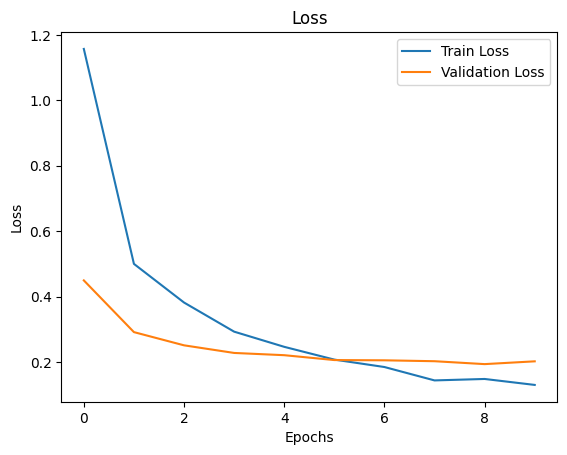

In [289]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [290]:
model.evaluate(x_test,  y_test, verbose=2)

1625/1625 - 2s - 1ms/step - accuracy: 0.9468 - loss: 0.2006


[0.2005651891231537, 0.9468269348144531]

In [291]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [292]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08685811, 0.08675127, 0.08680452, 0.20814714, 0.08674447,
        0.08685625, 0.08674517, 0.09415133, 0.08677072, 0.09017099],
       [0.08557439, 0.08587191, 0.08570856, 0.08582434, 0.08563059,
        0.08585942, 0.08571887, 0.08557536, 0.2284894 , 0.08574716],
       [0.08533683, 0.08533678, 0.0853368 , 0.08533679, 0.08533685,
        0.08533694, 0.2319686 , 0.08533679, 0.08533678, 0.08533678],
       [0.08541327, 0.08541261, 0.08541489, 0.08543514, 0.08541261,
        0.08541261, 0.0854126 , 0.23076448, 0.08541272, 0.08590911],
       [0.23196931, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674]],
      dtype=float32)>